In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
x=df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=df['Yearly Amount Spent']

In [6]:
print(x)

     Avg. Session Length  Time on App  Time on Website  Length of Membership
0              34.497268    12.655651        39.577668              4.082621
1              31.926272    11.109461        37.268959              2.664034
2              33.000915    11.330278        37.110597              4.104543
3              34.305557    13.717514        36.721283              3.120179
4              33.330673    12.795189        37.536653              4.446308
..                   ...          ...              ...                   ...
495            33.237660    13.566160        36.417985              3.746573
496            34.702529    11.695736        37.190268              3.576526
497            32.646777    11.499409        38.332576              4.958264
498            33.322501    12.391423        36.840086              2.336485
499            33.715981    12.418808        35.771016              2.735160

[500 rows x 4 columns]


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr=LinearRegression()

In [11]:
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
x_train.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [13]:
lr.coef_



array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [14]:
predictions=lr.predict(x_test)

In [15]:
import matplotlib.pyplot as plt

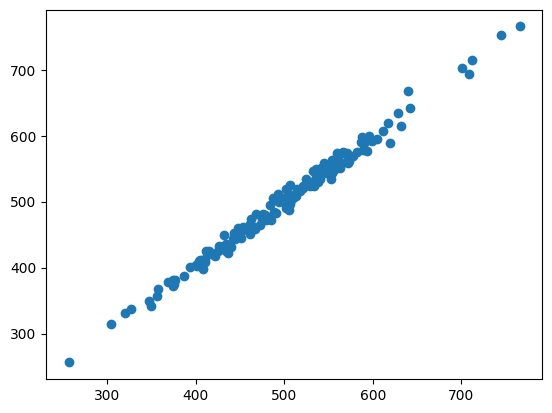

In [16]:
plt.scatter(y_test,predictions)


In [17]:
from sklearn import metrics

In [18]:
metrics.mean_absolute_error(y_test,predictions)

7.228148653430826

In [19]:
metrics.mean_squared_error(y_test,predictions)

79.81305165097427

In [20]:
import numpy as np

In [21]:
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))

8.933815066978624


In [22]:
from pyspark.sql  import SparkSession
import pyspark.sql.functions as F
from pyspark.ml.feature import VectorAssembler

In [23]:
spark=SparkSession.builder.getOrCreate()

In [24]:
type(df)

pandas.core.frame.DataFrame

In [25]:
df2=spark.createDataFrame(df)
df2.show(2)

+--------------------+--------------------+---------+-------------------+------------------+------------------+--------------------+-------------------+
|               Email|             Address|   Avatar|Avg. Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|
+--------------------+--------------------+---------+-------------------+------------------+------------------+--------------------+-------------------+
|mstephenson@ferna...|835 Frank Tunnel\...|   Violet|  34.49726772511229|12.655651149166752| 39.57766801952616|   4.082620632952961|  587.9510539684005|
|   hduke@hotmail.com|4547 Archer Commo...|DarkGreen|  31.92627202636016|11.109460728682564|37.268958868297744|    2.66403418213262|  392.2049334443264|
+--------------------+--------------------+---------+-------------------+------------------+------------------+--------------------+-------------------+
only showing top 2 rows



In [26]:
df2.columns

['Email',
 'Address',
 'Avatar',
 'Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent']

In [27]:
df2=df2.withColumnRenamed('Avg. Session Length','Avg SessionLength')

In [28]:
df2.show()

+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+
|               Email|             Address|          Avatar| Avg SessionLength|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|
+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+
|mstephenson@ferna...|835 Frank Tunnel\...|          Violet| 34.49726772511229|12.655651149166752| 39.57766801952616|   4.082620632952961|  587.9510539684005|
|   hduke@hotmail.com|4547 Archer Commo...|       DarkGreen| 31.92627202636016|11.109460728682564|37.268958868297744|    2.66403418213262|  392.2049334443264|
|    pallen@yahoo.com|24645 Valerie Uni...|          Bisque|33.000914755642675|11.330278057777512| 37.11059744212085|   4.104543202376424| 487.54750486747207|
|riverarebecca@gma...|1414 David Throug...|   

In [29]:
assembler=VectorAssembler(inputCols=['Avg SessionLength',
 'Time on App',
 'Time on Website',
 'Length of Membership'],outputCol='features')

In [30]:
assembler

VectorAssembler_92ab6e3cb0aa

In [31]:
output=assembler.transform(df2)

In [32]:
output.show(3)

+--------------------+--------------------+---------+------------------+------------------+------------------+--------------------+-------------------+--------------------+
|               Email|             Address|   Avatar| Avg SessionLength|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|            features|
+--------------------+--------------------+---------+------------------+------------------+------------------+--------------------+-------------------+--------------------+
|mstephenson@ferna...|835 Frank Tunnel\...|   Violet| 34.49726772511229|12.655651149166752| 39.57766801952616|   4.082620632952961|  587.9510539684005|[34.4972677251122...|
|   hduke@hotmail.com|4547 Archer Commo...|DarkGreen| 31.92627202636016|11.109460728682564|37.268958868297744|    2.66403418213262|  392.2049334443264|[31.9262720263601...|
|    pallen@yahoo.com|24645 Valerie Uni...|   Bisque|33.000914755642675|11.330278057777512| 37.11059744212085|   4.104543202376424| 487

In [33]:
output.select('features','Yearly Amount Spent').show(truncate=False)

+----------------------------------------------------------------------------+-------------------+
|features                                                                    |Yearly Amount Spent|
+----------------------------------------------------------------------------+-------------------+
|[34.49726772511229,12.655651149166752,39.57766801952616,4.082620632952961]  |587.9510539684005  |
|[31.92627202636016,11.109460728682564,37.268958868297744,2.66403418213262]  |392.2049334443264  |
|[33.000914755642675,11.330278057777512,37.11059744212085,4.104543202376424] |487.54750486747207 |
|[34.30555662975554,13.717513665142508,36.72128267790313,3.120178782748092]  |581.8523440352178  |
|[33.33067252364639,12.795188551078114,37.53665330059473,4.446308318351435]  |599.4060920457634  |
|[33.87103787934198,12.026925339755058,34.47687762925054,5.493507201364199]  |637.102447915074   |
|[32.02159550138701,11.366348309710526,36.683776152869605,4.685017246570912] |521.5721747578274  |
|[32.73914

In [34]:
df3=output.select('features','Yearly Amount Spent')
df3.show()

+--------------------+-------------------+
|            features|Yearly Amount Spent|
+--------------------+-------------------+
|[34.4972677251122...|  587.9510539684005|
|[31.9262720263601...|  392.2049334443264|
|[33.0009147556426...| 487.54750486747207|
|[34.3055566297555...|  581.8523440352178|
|[33.3306725236463...|  599.4060920457634|
|[33.8710378793419...|   637.102447915074|
|[32.0215955013870...|  521.5721747578274|
|[32.7391429383803...|  549.9041461052942|
|[33.9877728956856...|  570.2004089636195|
|[31.9365486184489...| 427.19938489532814|
|[33.9925727749537...|  492.6060127179966|
|[33.8793608248049...|  522.3374046069357|
|[29.5324289670579...| 408.64035107262754|
|[33.1903340437226...|  573.4158673313865|
|[32.3879758531538...| 470.45273330095546|
|[30.7377203726281...|  461.7807421962299|
|[32.1253868972878...| 457.84769594494855|
|[32.3388993230671...|  407.7045475495441|
|[32.1878120459321...| 452.31567548003545|
|[32.6178560628234...|   605.061038804892|
+----------

In [36]:
train_data,test_data=df3.randomSplit([0.7,0.3],seed=101)

In [37]:
train_data.show(2)

+--------------------+-------------------+
|            features|Yearly Amount Spent|
+--------------------+-------------------+
|[29.5324289670579...| 408.64035107262754|
|[30.7377203726281...|  461.7807421962299|
+--------------------+-------------------+
only showing top 2 rows



In [38]:
test_data.show(2)

+--------------------+-------------------+
|            features|Yearly Amount Spent|
+--------------------+-------------------+
|[31.5147378578019...|  489.8124879964614|
|[31.5316044825729...| 436.51560572936256|
+--------------------+-------------------+
only showing top 2 rows



In [39]:
from pyspark.ml.regression import LinearRegression

In [40]:
lr=LinearRegression(featuresCol='features',labelCol='Yearly Amount Spent')

In [41]:
model=lr.fit(train_data)

In [42]:
model

LinearRegressionModel: uid=LinearRegression_3af6d603273a, numFeatures=4

In [43]:
slope = model.coefficients


print(f"Slope (Coefficient): {slope}")

Slope (Coefficient): [25.22618619948228,38.36968600007006,0.5901256489939196,61.73825685070142]


In [44]:
test_unlabeled=test_data.select('features')

In [45]:
test_unlabeled.show(2)

+--------------------+
|            features|
+--------------------+
|[31.5147378578019...|
|[31.5316044825729...|
+--------------------+
only showing top 2 rows



In [46]:
predictions=model.transform(test_unlabeled)

In [47]:
predictions.show()

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|[31.5147378578019...|495.47985287065194|
|[31.5316044825729...|432.41932580446746|
|[32.0123007682454...| 489.1051232302184|
|[32.0215955013870...| 516.9952868933283|
|[32.0637746203137...| 390.0963490861034|
|[32.1253868972878...|437.03335197866704|
|[32.1790999726023...| 446.1573158151648|
|[32.1878120459321...|454.99661058263405|
|[32.4017318273546...| 505.1724068939461|
|[32.4256972797508...|401.35586782055634|
|[32.4307579300512...| 407.9563649717836|
|[32.6055836415705...|510.95080313199696|
|[32.7283600031337...| 487.6748532294939|
|[32.7726099296008...| 533.6877799720069|
|[32.7897726183107...| 470.0269527228097|
|[32.8052204009718...|477.69078964433334|
|[32.8653271748764...|486.10698640304304|
|[32.9032509733720...| 503.1889179663217|
|[33.0009147556426...|  504.730195063986|
|[33.0195479857234...| 512.1696567411761|
+--------------------+------------

In [48]:
results=model.evaluate(test_data)
print(f"Root Mean Squared Error (RMSE): {results.rootMeanSquaredError}")


Root Mean Squared Error (RMSE): 10.087686778508816


In [49]:
actual=test_data.toPandas()
predict=predictions.toPandas()

actual.head()


,features,Yearly Amount Spent
0,"[31.514737857801983, 12.595671305072534, 39.60...",489.812488
1,"[31.531604482572902, 13.378562784168986, 38.73...",436.515606
2,"[32.01230076824544, 12.178331333996288, 37.715...",492.945053
3,"[32.02159550138701, 11.366348309710526, 36.683...",521.572175
4,"[32.0637746203137, 10.719149740628396, 37.7125...",378.330907


In [50]:
predict.head()


,features,prediction
0,"[31.514737857801983, 12.595671305072534, 39.60...",495.479853
1,"[31.531604482572902, 13.378562784168986, 38.73...",432.419326
2,"[32.01230076824544, 12.178331333996288, 37.715...",489.105123
3,"[32.02159550138701, 11.366348309710526, 36.683...",516.995287
4,"[32.0637746203137, 10.719149740628396, 37.7125...",390.096349


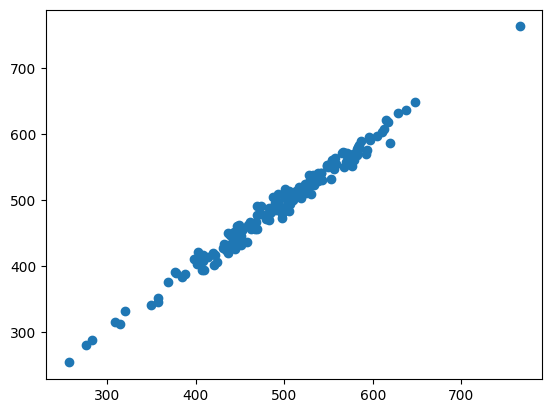

In [51]:
import matplotlib.pyplot as plt

plt.scatter(actual['Yearly Amount Spent'],predict['prediction'])
plt.show()

In [52]:
spark.stop()